In [4]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error


In [5]:

from afinn import Afinn
afinn = Afinn()


In [6]:
df = pd.read_csv('/Users/varsha/.spyder-py3/Hawley.csv')

df.head(3)

,tweet,Created-At,From-User,Retweet-Count,Account,Id
0,Fox News on Twitter: &quot;.@HawleyMO on migra...,2018-10-23 10:25:46,Fox News,471.0,Hawley,1.054741e+18
1,Laura Packard on Twitter: &quot;Speaking out w...,2018-10-22 13:37:35,Laura Packard,38.0,Hawley,1.054427e+18
2,Stephen Webber on Twitter: &quot;Buchanan Co. ...,2018-10-22 19:59:33,Stephen Webber,18.0,Hawley,1.054523e+18


In [7]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(text) for text in df.tweet]
df['afinn'] = afinn_scores


In [8]:

#compute sentiment scores (polarity) and labels
sentiment_scores = [afinn.score(text) for text in df.tweet]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [9]:
df1 = pd.DataFrame([list(df['tweet']), sentiment_scores, sentiment_category]).T
df1.columns = ['tweet', 'sentiment_scores', 'sentiment_category']
df1['sentiment_scores'] = df1.sentiment_scores.astype('float')
df1.groupby(by=['tweet']).describe()


sentiment_scores        \
                                                              count  mean   
tweet                                                                       
#MAGA #KAG w #Trump - #VoteRedToSaveAmerica on ...              1.0   0.0   
.@HawleyMO was in Springfield at the local @Mis...              1.0   0.0   
??Gigets Mom ?? on Twitter: &quot;C&#39;mon...J...              1.0   0.0   
??️‍????️‍????Dems Rise Up, Unite, Vote Blue!! ...              1.0   8.0   
@1_non_nocere: @HawleyMO @clairecmc Sounds like...              1.0   2.0   
@2017Amazing @HawleyMO @clairecmc Your ignoranc...              1.0  -5.0   
@971FMTalk: Happy Monday it's the Marc Cox Show...              2.0   3.0   
@AKAReSister: Among #Missouri women who watched...              3.0   0.0   
@A_Tall_Turner @HawleyMO Are you telling me tha...              1.0   0.0   
@AndrewMillerKC: @HawleyMO @KelliAFord @clairec...              1.0   3.0   
@Andy @HawleyMO I love when you get political ?...              1.0   3.0   
@Andy @HawleyMO Yes! Help his competition (Clai...              1.0   3.0   
@Andy @HawleyMO get off twitter and go get @Ken...              1.0   0.0   
@Andy: Hey @HawleyMO, your record as AG sucks....               8.0  -3.0   
@BarryAycock: @JeffSmithMO Rookie mistakes, inc...              1.0  -4.0   
@BigElad: "[Gross] also mailed Hawley’s office ...              1.0  -2.0   
@BigGator5: #MOSen: Allegations Surface Against...              2.0  -4.0   
@Brandon_Blac @KCStar @jeffreywbruce @HawleyMO ...              1.0   0.0   
@BrookeGoren: Lots of news to digest about @Haw...              1.0   0.0   
@BryanLowry3: .⁦@HawleyMO⁩ says he doesn’t use ...              5.0   0.0   
@BryanLowry3: NEW: @HawleyMO campaign and @NRA'...              2.0  -4.0   
@BryanLowry3: The same person placed ads for @H...              3.0   0.0   
@CASE103060: So now @clairecmc is now blaming h...              2.0  -2.0   
@CSBence: @HawleyMO @clairecmc You made the new...              1.0  -2.0   
@CShitposting @EveHammond13 @kevinmcdermott @Ha...              1.0   0.0   
@Clark2June: @kazamareen @tuckster999 @projectv...              2.0   0.0   
@ES03784893: Perhaps the reason @GOP political ...              2.0   0.0   
@ES03784893: So glad to know @HawleyMO has the ...              4.0   7.0   
@ES03784893: Yeah. No evidence of foreign suppo...              2.0   3.0   
@EagleEdMartin: Join me on #TheMovement?? \nI'l...              2.0   1.0   
...                                                             ...   ...   
Team Hawley on Twitter: &quot;.@HawleyMO was in...              1.0   0.0   
Team Hawley on Twitter: &quot;Great crowd today...              1.0   8.0   
Team Hawley on Twitter: &quot;Really? @clairecm...              1.0   3.0   
The Voice For Washington’s Silenced Majority on...              1.0   1.0   
Tiffany Marler on Twitter: &quot;@HawleyMO @Mis...              1.0   1.0   
Tiffany Marler on Twitter: &quot;I already vote...              1.0   1.0   
Tiffany Marler on Twitter: &quot;So not 20 minu...              1.0   1.0   
Tiffany Marler on Twitter: &quot;This is awesom...              1.0   4.0   
Tiffany Marler on Twitter: &quot;WTH?????!!!!!!...              1.0  -1.0   
Travis Cook on Twitter: &quot;I wish they would...              1.0  -1.0   
Travis Cook on Twitter: &quot;I&#39;m not a bil...              1.0   0.0   
Travis Cook on Twitter: &quot;We got along just...              1.0   3.0   
Two New Polls Show Republicans Leading in Arizo...              1.0   2.0   
Tyler Daniels on Twitter: &quot;Missouri doesn&...              1.0   3.0   
When was the last time anything positive was wr...              1.0   0.0   
Yellow Dog Democrat on Twitter: &quot;@SpeakerT...              1.0   0.0   
You know it's bad when @HawleyMO is refusing to...              1.0  -5.0   
amy on Twitter: &quot;You are obsessed with Cla...              1.0   7.0   
amy on Twitter: &quot;You seem to forget that Y

In [10]:

#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df1.groupby("sentiment_scores")["tweet"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["TextClean"] = cluster1["tweet"].apply(cleanReviews)



In [11]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [12]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
        

In [13]:
df1["sentiment_category"].describe()

count          792
unique           3
top       negative
freq           417
Name: sentiment_category, dtype: object

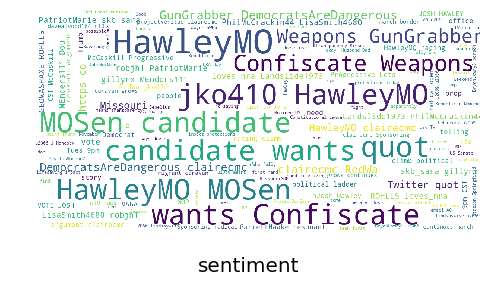

In [15]:
#Wordcloud on unclean data       
#category 0
show_wordcloud(cluster['tweet'][0], title ="sentiment")    
    

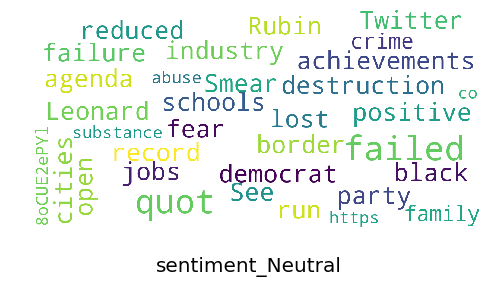

In [16]:
#Wordcloud on cleaned data      
#category 0
show_wordcloud(cluster1['tweet'][0], title ="sentiment_Neutral")    
    

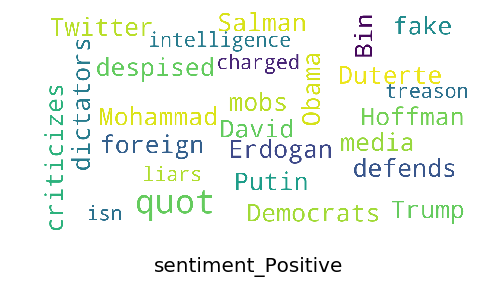

In [17]:
show_wordcloud(cluster1['tweet'][1], title ="sentiment_Positive")    
    

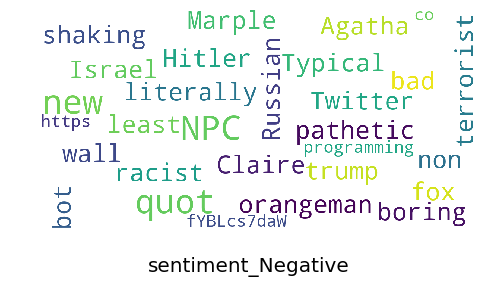

In [18]:
show_wordcloud(cluster1['tweet'][2], title ="sentiment_Negative")    
    

In [19]:
df1["sentiment_category"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)